# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [104]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [20]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities

Number of cities in the list: 607


['rikitea',
 'kyra',
 'tirumullaivasal',
 'namatanai',
 'richards bay',
 'bluff',
 'butaritari',
 'qaanaaq',
 'jamestown',
 'marcona',
 'rexburg',
 'port elizabeth',
 'gat',
 'cape town',
 'meyungs',
 'ushuaia',
 'busselton',
 'nantucket',
 'tasiilaq',
 'aktau',
 'lavrentiya',
 'port macquarie',
 'borlange',
 'galle',
 'illoqqortoormiut',
 'ambodifototra',
 'taolanaro',
 'warri',
 'hasaki',
 'fare',
 'artyk',
 'mys shmidta',
 'chapais',
 'falealupo',
 'margate',
 'hashtrud',
 'saint george',
 'chicama',
 'edd',
 'san diego',
 'laguna',
 'prado',
 'punta arenas',
 'puerto ayora',
 'ribeira grande',
 'hermanus',
 'airai',
 'bud',
 'katsuura',
 'castro',
 'tshikapa',
 'san juan',
 'milkovo',
 'khatanga',
 'fatezh',
 'asau',
 'waipawa',
 'luderitz',
 'portland',
 'bolshaya yelkhovka',
 'hualmay',
 'muros',
 'pisco',
 'rivers',
 'kapaa',
 'owase',
 'joinville',
 'plettenberg bay',
 'komsomolskiy',
 'mangrol',
 'hermosillo',
 'atuona',
 'vaini',
 'port alfred',
 'kruisfontein',
 'lexington',

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =f'{url}{city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max'] - 273.15
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | kyra
Processing Record 3 of Set 1 | tirumullaivasal
Processing Record 4 of Set 1 | namatanai
Processing Record 5 of Set 1 | richards bay
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | marcona
City not found. Skipping...
Processing Record 11 of Set 1 | rexburg
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | gat
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | meyungs
City not found. Skipping...
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | nantucket
Processing Record 19 of Set 1 | tasiilaq
Processing Record 20 of Set 1 | aktau
Processing Record 21 of Set 1 | lavrentiya
Processing Record 22 of Set

Processing Record 41 of Set 4 | galgani
City not found. Skipping...
Processing Record 42 of Set 4 | saint-philippe
Processing Record 43 of Set 4 | teguise
Processing Record 44 of Set 4 | vestmannaeyjar
Processing Record 45 of Set 4 | kavieng
Processing Record 46 of Set 4 | tiksi
Processing Record 47 of Set 4 | camacha
Processing Record 48 of Set 4 | puro
Processing Record 49 of Set 4 | kharp
Processing Record 0 of Set 5 | taltal
Processing Record 1 of Set 5 | kavaratti
Processing Record 2 of Set 5 | victoria
Processing Record 3 of Set 5 | geraldton
Processing Record 4 of Set 5 | angoche
Processing Record 5 of Set 5 | kismayo
Processing Record 6 of Set 5 | shubarkuduk
Processing Record 7 of Set 5 | soe
Processing Record 8 of Set 5 | souillac
Processing Record 9 of Set 5 | mizan teferi
Processing Record 10 of Set 5 | seoul
Processing Record 11 of Set 5 | ludvika
Processing Record 12 of Set 5 | arraial do cabo
Processing Record 13 of Set 5 | havelock
Processing Record 14 of Set 5 | machic

Processing Record 29 of Set 8 | mrirt
City not found. Skipping...
Processing Record 30 of Set 8 | iquitos
Processing Record 31 of Set 8 | lubao
Processing Record 32 of Set 8 | dakar
Processing Record 33 of Set 8 | nyurba
Processing Record 34 of Set 8 | perth
Processing Record 35 of Set 8 | praia da vitoria
Processing Record 36 of Set 8 | hamilton
Processing Record 37 of Set 8 | general roca
Processing Record 38 of Set 8 | acajutla
Processing Record 39 of Set 8 | emba
Processing Record 40 of Set 8 | rocky mount
Processing Record 41 of Set 8 | lazaro cardenas
Processing Record 42 of Set 8 | tabou
Processing Record 43 of Set 8 | turukhansk
Processing Record 44 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 45 of Set 8 | imbituba
Processing Record 46 of Set 8 | guerrero negro
Processing Record 47 of Set 8 | susangerd
Processing Record 48 of Set 8 | shimoda
Processing Record 49 of Set 8 | colac
Processing Record 0 of Set 9 | sweetwater
Processing Record 1 of Set 9 | ca

Processing Record 17 of Set 12 | ndele
Processing Record 18 of Set 12 | yerbogachen
Processing Record 19 of Set 12 | kaduqli
Processing Record 20 of Set 12 | pavino
Processing Record 21 of Set 12 | bhor
Processing Record 22 of Set 12 | acari
Processing Record 23 of Set 12 | phibun mangsahan
Processing Record 24 of Set 12 | changji
Processing Record 25 of Set 12 | jacqueville
Processing Record 26 of Set 12 | tokat
Processing Record 27 of Set 12 | port hedland
Processing Record 28 of Set 12 | lorengau
Processing Record 29 of Set 12 | tran
Processing Record 30 of Set 12 | katherine
Processing Record 31 of Set 12 | verkhoyansk
Processing Record 32 of Set 12 | pierre
Processing Record 33 of Set 12 | albanel
Processing Record 34 of Set 12 | darnah
Processing Record 35 of Set 12 | bilma
Processing Record 36 of Set 12 | umm lajj
Processing Record 37 of Set 12 | coahuayana
Processing Record 38 of Set 12 | omboue
Processing Record 39 of Set 12 | taurage
Processing Record 40 of Set 12 | kachikau


In [22]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [23]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,25.99,76,100,5.29,PF,1678017589
1,kyra,49.5776,111.9753,-1.49,81,90,3.20,RU,1678017460
2,tirumullaivasal,11.2333,79.8333,27.18,65,100,4.81,IN,1678017589
3,namatanai,-3.6667,152.4333,26.28,79,100,3.58,PG,1678017590
4,richards bay,-28.7830,32.0377,27.84,65,83,4.90,ZA,1678017590


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [105]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,25.99,76,100,5.29,PF,1678017589
1,kyra,49.5776,111.9753,-1.49,81,90,3.20,RU,1678017460
2,tirumullaivasal,11.2333,79.8333,27.18,65,100,4.81,IN,1678017589
3,namatanai,-3.6667,152.4333,26.28,79,100,3.58,PG,1678017590
4,richards bay,-28.7830,32.0377,27.84,65,83,4.90,ZA,1678017590


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

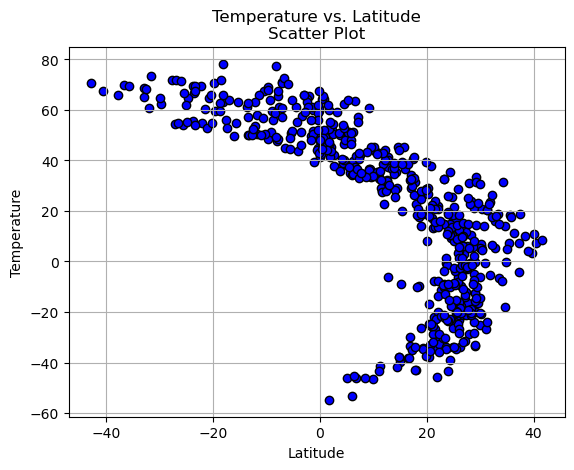

In [106]:
# Build scatter plot for latitude vs. temperature
# plt.scatter(city_data_df['Max Temp'], city_data_df['Lat'])

# Incorporate the other graph properties
plt.scatter(city_data_df['Max Temp'], city_data_df['Lat'],marker="o", facecolors="blue", edgecolors="black")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Temperature vs. Latitude\nScatter Plot')
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

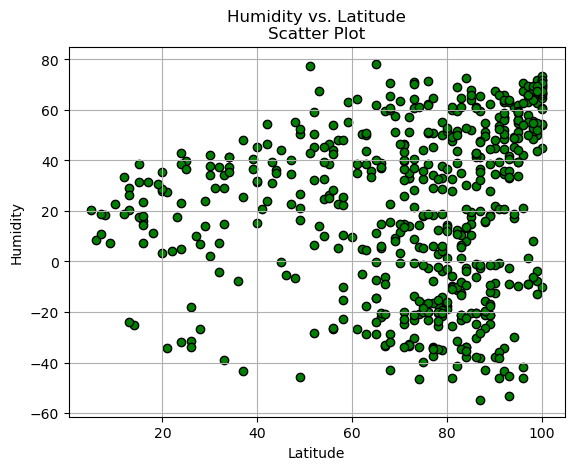

In [107]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
plt.scatter(city_data_df['Humidity'], city_data_df['Lat'],marker="o", facecolors="green", edgecolors="black")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude\nScatter Plot')
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

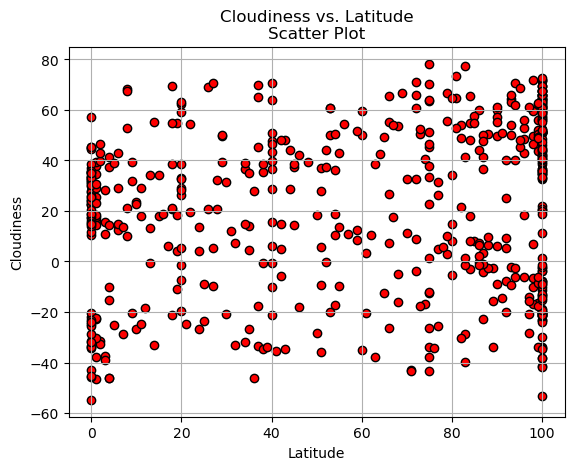

In [108]:
# Build the scatter plots for latitude vs. cloudiness

# Incorporate the other graph properties
plt.scatter(city_data_df['Cloudiness'], city_data_df['Lat'],marker="o", facecolors="red", edgecolors="black")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs. Latitude\nScatter Plot')
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

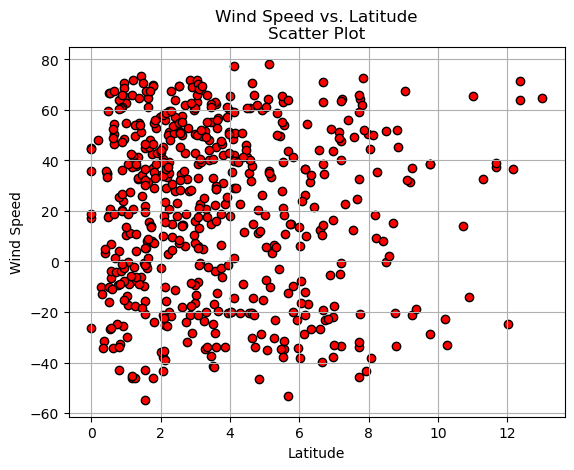

In [109]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Wind Speed'], city_data_df['Lat'],marker="o", facecolors="red", edgecolors="black")
plt.grid()
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs. Latitude\nScatter Plot')
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [49]:
# Define a function to create Linear Regression plots
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#r_squared = round(rvalue**2,2)
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kyra,49.5776,111.9753,-1.49,81,90,3.20,RU,1678017460
2,tirumullaivasal,11.2333,79.8333,27.18,65,100,4.81,IN,1678017589
6,butaritari,3.0707,172.7902,26.91,78,79,2.22,KI,1678017590
7,qaanaaq,77.4840,-69.3632,-8.13,51,83,4.12,GL,1678017590
8,jamestown,42.0970,-79.2353,2.62,96,100,4.12,US,1678017590


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,25.99,76,100,5.29,PF,1678017589
3,namatanai,-3.6667,152.4333,26.28,79,100,3.58,PG,1678017590
4,richards bay,-28.7830,32.0377,27.84,65,83,4.90,ZA,1678017590
5,bluff,-46.6000,168.3333,9.96,74,1,4.85,NZ,1678017590
10,port elizabeth,-33.9180,25.5701,26.17,84,100,3.60,ZA,1678017571


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8820330403653829


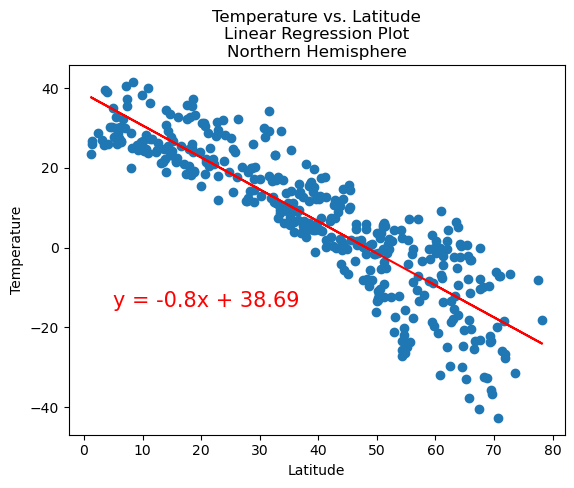

In [97]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f'The r-value is: {rvalue}')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,-15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Temperature vs. Latitude\nLinear Regression Plot\nNorthern Hemisphere')
plt.show()

The r-value is: 0.6282695056353333


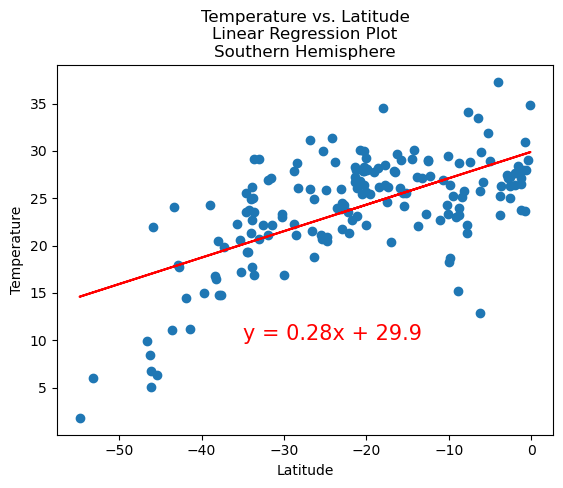

In [96]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f'The r-value is: {rvalue}')
sline_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(sline_eq,(-35,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Temperature vs. Latitude\nLinear Regression Plot\nSouthern Hemisphere')
plt.show()

**Discussion about the linear relationship:** In north, temperature decrease while latitude increase. Howerver, it is opposite in South.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4315946234074454


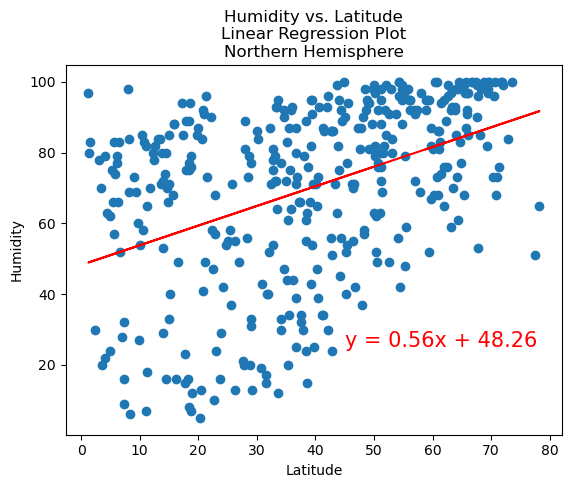

In [95]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
r_squared = round(rvalue**2,2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue}')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude\nLinear Regression Plot\nNorthern Hemisphere')
plt.show()
plt.show()

The r-value is: 0.07838124185595008


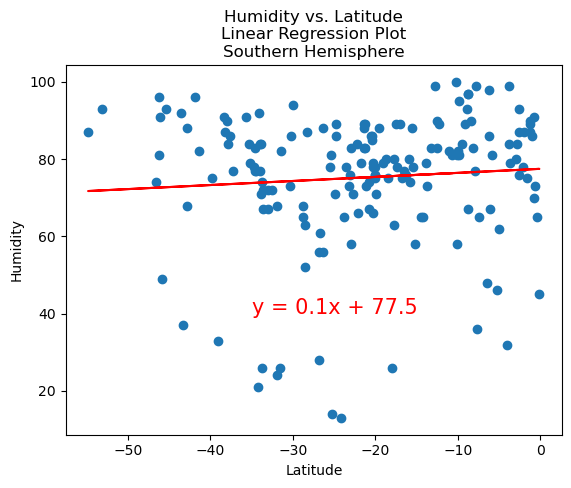

In [93]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
r_squared = round(rvalue**2,2)
sline_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue}')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(sline_eq,(-35,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude\nLinear Regression Plot\nSouthern Hemisphere')
plt.show()

**Discussion about the linear relationship:** In north, humidity increase while latitude increase. And it is same in south.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3963432200582088


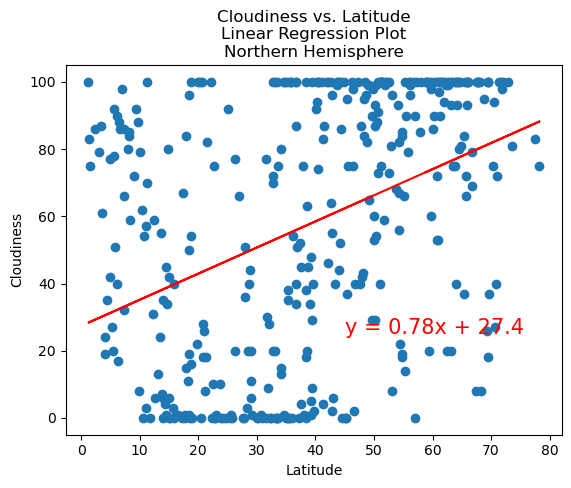

In [92]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
r_squared = round(rvalue**2,2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue}')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs. Latitude\nLinear Regression Plot\nNorthern Hemisphere')
plt.show()

The r-value is: 0.3481830164428546


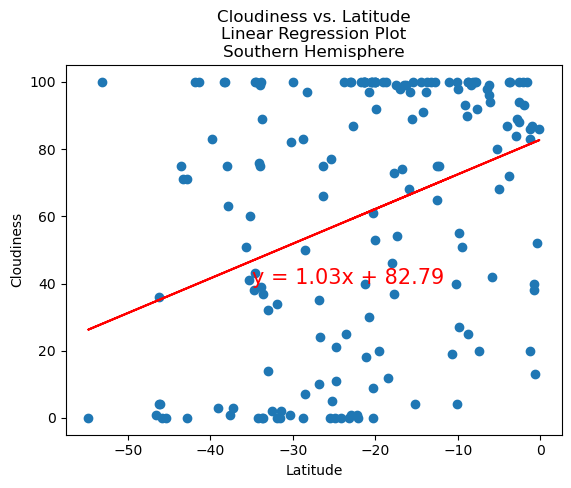

In [89]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
r_squared = round(rvalue**2,2)
sline_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue}')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(sline_eq,(-35,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs. Latitude\nLinear Regression Plot\nSouthern Hemisphere')
plt.show()

**Discussion about the linear relationship:** Both north and south, cloudiness increase while latitude increase. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.04310591567252337


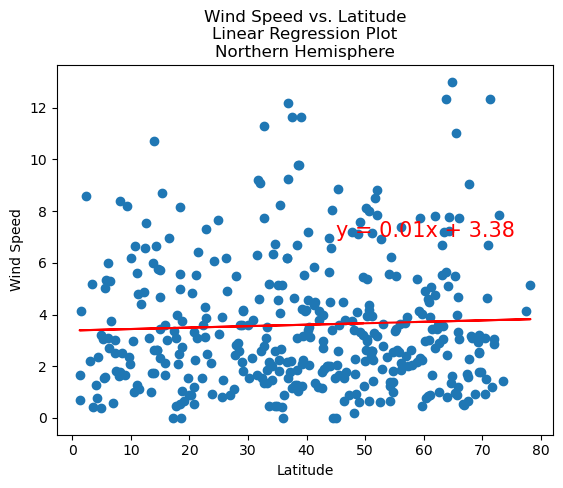

In [90]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
r_squared = round(rvalue**2,2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue}')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,7),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs. Latitude\nLinear Regression Plot\nNorthern Hemisphere')
plt.show()

The r-value is: -0.16736907294350756


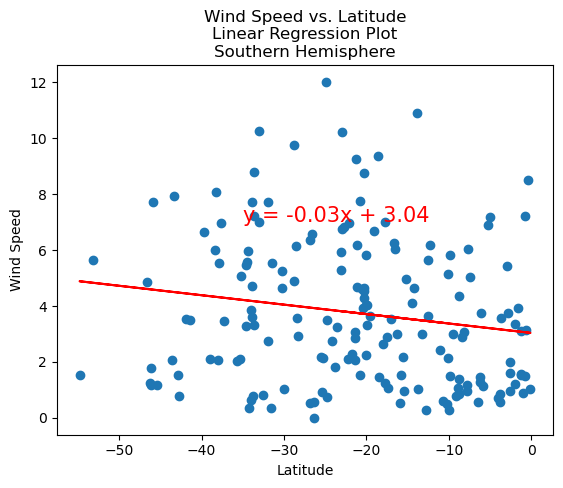

In [91]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
r_squared = round(rvalue**2,2)
sline_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue}')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(sline_eq,(-35,7),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs. Latitude\nLinear Regression Plot\nSouthern Hemisphere')
plt.show()

**Discussion about the linear relationship:** In north, wind speed increase while latitude increase. Howerver, it is opposite in South. Both unobviousily